In [1219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay, classification_report

In [1220]:
df=pd.read_csv('C:/Users/asnav/Documents/MachineLearningProjects/loan_approval_prediction_using_classification/data/loan_approval_prediction.csv')

In [1221]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [1222]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [1223]:
df.shape

(614, 13)

In [1224]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [1225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [1226]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [1227]:
df.drop(['Loan_ID'],inplace=True ,axis=1 )
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [1228]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1229]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

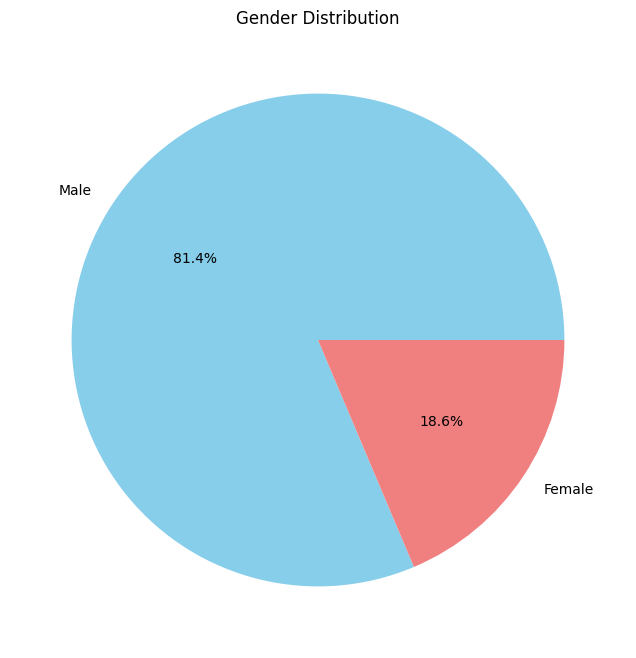

In [1230]:
gender_counts=df['Gender'].value_counts()
gender_label=['Male','Female']

plt.figure(figsize=(10,8))
plt.pie(gender_counts,labels=gender_label,autopct='%1.1f%%',colors=['skyblue','lightcoral'])
plt.title('Gender Distribution')
plt.show()

In [1231]:
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

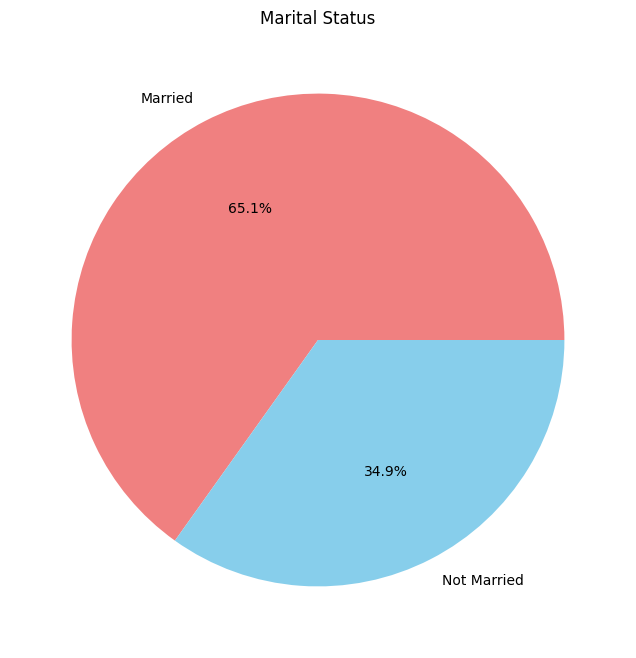

In [1232]:
gender_counts=df['Married'].value_counts()
gender_label=['Married','Not Married']

plt.figure(figsize=(10,8))
plt.pie(gender_counts,labels=gender_label,autopct='%1.1f%%',colors=['lightcoral','skyblue'])
plt.title('Marital Status')
plt.show()

In [1233]:
df1=df['Dependents'].value_counts()
df1

Dependents
0     345
1     102
2     101
3+     50
3       1
Name: count, dtype: int64

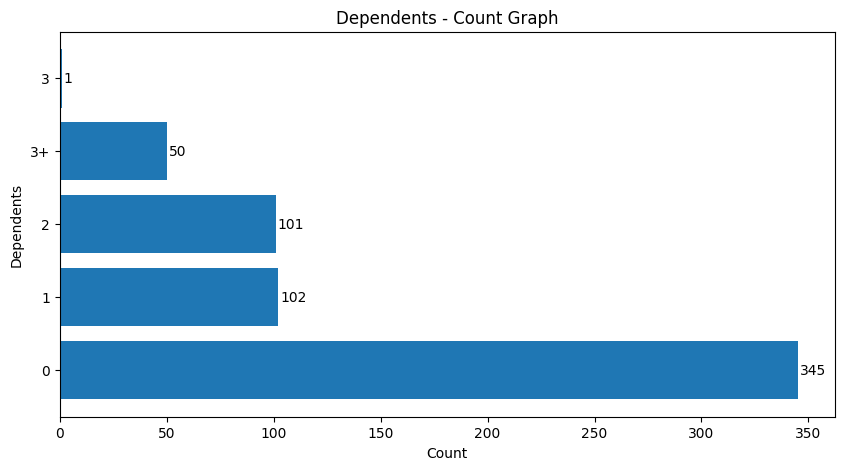

In [1234]:
plt.figure(figsize=(10,5))

plt.barh(df1.index,df1.values)
plt.xlabel('Count')
plt.ylabel('Dependents')
plt.title('Dependents - Count Graph')

for i, value in enumerate(df1.values):
    plt.text(value + 1, df1.index[i], str(value), va='center')

plt.show()

In [1235]:
df2=df['Education'].value_counts()
df2

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

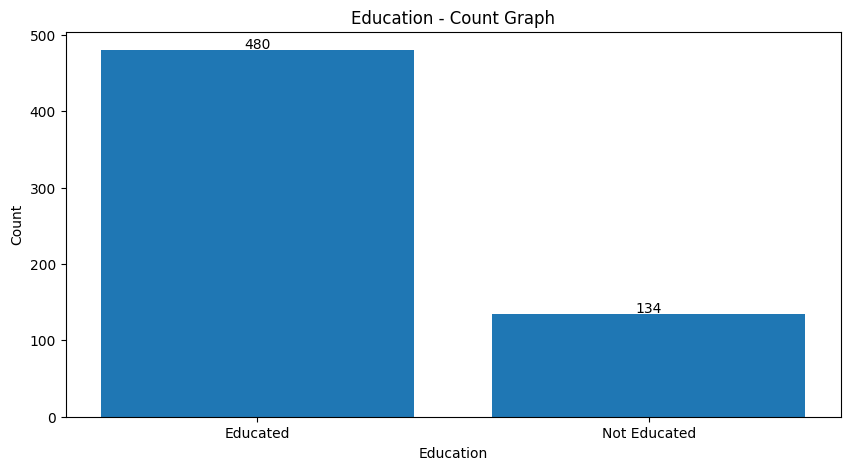

In [1236]:
plt.figure(figsize=(10,5))

labels = ['Educated', 'Not Educated']

plt.bar(labels,df2.values)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education - Count Graph')

for i, value in enumerate(df2.values):
    plt.text(i, value + 2, str(value), ha='center')

plt.show()

In [1237]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

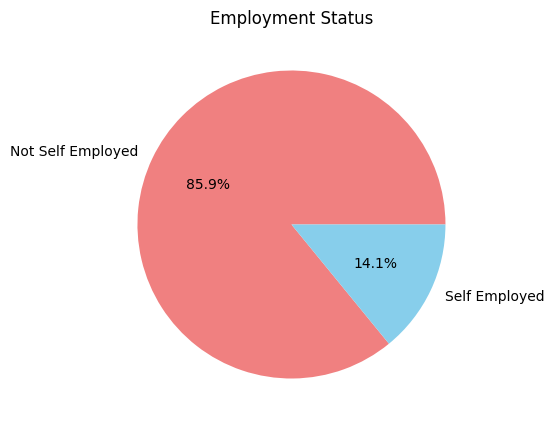

In [1238]:
employment_counts=df['Self_Employed'].value_counts()
emploment_label=['Not Self Employed','Self Employed']

plt.figure(figsize=(10,5))
plt.pie(employment_counts,labels=emploment_label,autopct='%1.1f%%',colors=['lightcoral','skyblue'])
plt.title('Employment Status')
plt.show()

In [1239]:
df3=df['Property_Area'].value_counts()
df3

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

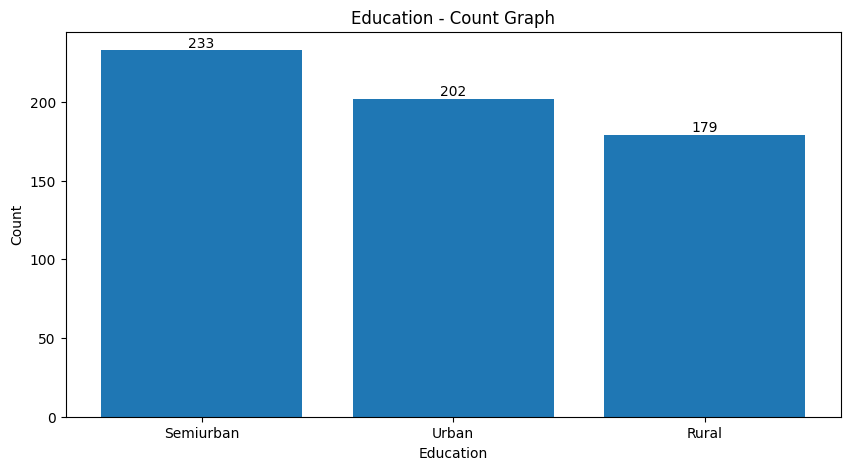

In [1240]:
plt.figure(figsize=(10,5))

labels = ['Semiurban', 'Urban','Rural']

plt.bar(labels,df3.values)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education - Count Graph')

for i, value in enumerate(df3.values):
    plt.text(i, value + 2, str(value), ha='center')

plt.show()

In [1241]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [1242]:
df.dropna(subset=['Gender'],inplace=True,axis=0)

In [1243]:
df.shape

(601, 12)

In [1244]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [1245]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [1246]:
df['Dependents'].unique()

array(['0', '1', '2', '3', '3+', nan], dtype=object)

In [1247]:
df["Dependents"]=df["Dependents"].str.replace('3+','4')

In [1248]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [1249]:
df["Dependents"]=df["Dependents"].astype(int)

In [1250]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [1251]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [1252]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 151., 191., 122., 110.,  35., 201.,  74., 106., 320., 144.,
       184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 112., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 182., 650., 102., 290.,  84., 242., 129.,
        30., 244., 600., 255.,  98., 275., 121.,  63.,  87., 101., 495.,
        67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,  90., 166.,
       124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,  42., 280.,
       140., 155., 123., 279., 192., 304., 330., 150., 207., 436.,  78.,
        54.,  89., 143., 105., 132., 480.,  56., 300., 376., 117.,  71.,
       490., 173.,  46., 228., 308., 236., 570., 38

In [1253]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [1254]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [1255]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [1256]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [1257]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [1258]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [1259]:
df.duplicated().sum()

np.int64(0)

In [1260]:
label=LabelEncoder()
df['Gender']=label.fit_transform(df['Gender'])
df['Gender']

0      1
1      1
2      1
3      1
4      1
      ..
609    0
610    1
611    1
612    1
613    0
Name: Gender, Length: 601, dtype: int64

In [1261]:
df['Married']=label.fit_transform(df['Married'])
df['Married']

0      0
1      1
2      1
3      1
4      0
      ..
609    0
610    1
611    1
612    1
613    0
Name: Married, Length: 601, dtype: int64

In [1262]:
df['Education']=label.fit_transform(df['Education'])
df['Education']

0      0
1      0
2      0
3      1
4      0
      ..
609    0
610    0
611    0
612    0
613    0
Name: Education, Length: 601, dtype: int64

In [1263]:
df['Self_Employed']=label.fit_transform(df['Self_Employed'])
df['Self_Employed']

0      0
1      0
2      1
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Self_Employed, Length: 601, dtype: int64

In [1264]:
df['Property_Area']=label.fit_transform(df['Property_Area'])
df['Property_Area']

0      2
1      0
2      2
3      2
4      2
      ..
609    0
610    0
611    2
612    2
613    1
Name: Property_Area, Length: 601, dtype: int64

In [1265]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,145.017271,360.0,1.0,2,Y
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y


In [1266]:
x=df.iloc[:,:-1].values
x

array([[  1.,   0.,   0., ..., 360.,   1.,   2.],
       [  1.,   1.,   1., ..., 360.,   1.,   0.],
       [  1.,   1.,   0., ..., 360.,   1.,   2.],
       ...,
       [  1.,   1.,   1., ..., 360.,   1.,   2.],
       [  1.,   1.,   2., ..., 360.,   1.,   2.],
       [  0.,   0.,   0., ..., 360.,   0.,   1.]], shape=(601, 11))

In [1267]:
y=df.iloc[:,-1].values
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N

In [1268]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
x_train

array([[  0.,   1.,   0., ..., 360.,   1.,   0.],
       [  1.,   1.,   0., ..., 360.,   1.,   0.],
       [  1.,   0.,   0., ..., 360.,   1.,   0.],
       ...,
       [  1.,   0.,   0., ..., 360.,   1.,   0.],
       [  1.,   0.,   0., ..., 360.,   1.,   0.],
       [  1.,   1.,   0., ..., 360.,   0.,   2.]], shape=(420, 11))

In [1269]:
x_test

array([[  0.,   0.,   0., ..., 360.,   1.,   0.],
       [  1.,   1.,   2., ..., 360.,   1.,   2.],
       [  1.,   0.,   0., ..., 360.,   1.,   0.],
       ...,
       [  1.,   1.,   1., ..., 360.,   1.,   2.],
       [  1.,   1.,   0., ..., 360.,   0.,   0.],
       [  1.,   1.,   4., ..., 360.,   1.,   0.]], shape=(181, 11))

In [1270]:
y_train

array(['N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y

In [1271]:
y_test

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y

In [1272]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-2.04577252,  0.72613547, -0.68636366, ...,  0.26620756,
         0.42790021, -1.31834822],
       [ 0.4888129 ,  0.72613547, -0.68636366, ...,  0.26620756,
         0.42790021, -1.31834822],
       [ 0.4888129 , -1.37715349, -0.68636366, ...,  0.26620756,
         0.42790021, -1.31834822],
       ...,
       [ 0.4888129 , -1.37715349, -0.68636366, ...,  0.26620756,
         0.42790021, -1.31834822],
       [ 0.4888129 , -1.37715349, -0.68636366, ...,  0.26620756,
         0.42790021, -1.31834822],
       [ 0.4888129 ,  0.72613547, -0.68636366, ...,  0.26620756,
        -2.33699347,  1.24510665]], shape=(420, 11))

In [1273]:
x_test

array([[-2.04577252, -1.37715349, -0.68636366, ...,  0.26620756,
         0.42790021, -1.31834822],
       [ 0.4888129 ,  0.72613547,  0.9377081 , ...,  0.26620756,
         0.42790021,  1.24510665],
       [ 0.4888129 , -1.37715349, -0.68636366, ...,  0.26620756,
         0.42790021, -1.31834822],
       ...,
       [ 0.4888129 ,  0.72613547,  0.12567222, ...,  0.26620756,
         0.42790021,  1.24510665],
       [ 0.4888129 ,  0.72613547, -0.68636366, ...,  0.26620756,
        -2.33699347, -1.31834822],
       [ 0.4888129 ,  0.72613547,  2.56177987, ...,  0.26620756,
         0.42790021, -1.31834822]], shape=(181, 11))

In [1274]:
model=KNeighborsClassifier(n_neighbors=7)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y

In [1275]:
y_test

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y

In [1276]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 22,  24],
       [  5, 130]])

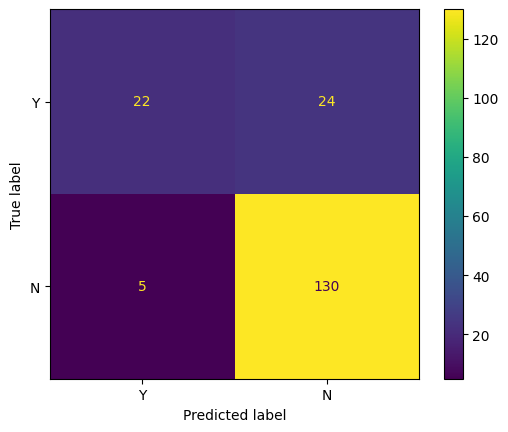

In [1277]:
labels=['Y', 'N']
cmd=ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()

In [1278]:
score=accuracy_score(y_test,y_pred)
score

0.8397790055248618

In [1279]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           N       0.81      0.48      0.60        46
           Y       0.84      0.96      0.90       135

    accuracy                           0.84       181
   macro avg       0.83      0.72      0.75       181
weighted avg       0.84      0.84      0.82       181

